In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os

In [2]:

# Carga de archivos CSV
csv1 = "lc1.csv"
csv2 = "lc2.csv"

df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

# Comprobamos que tienen las mismas dimensiones
if df1['flux_normalized'] != df2["flux_normalized"]:
    print("❌ Las curvas de luz tienen diferentes dimensiones.")
else:
    # Comparación exacta
    iguales = df1['flux_normalized'].equals(df2['flux_normalized'])
    
    # Comparación con tolerancia (por si hay diferencias pequeñas)
    tolerancia = 1e-6
    similares = np.allclose(df1['flux_normalized'].values, df2['flux_normalized'].values, rtol=0, atol=tolerancia)

    if iguales:
        print("✅ Las curvas de luz son EXACTAMENTE iguales.")
    elif similares:
        print(f"🟡 Las curvas de luz son casi iguales (diferencias menores a {tolerancia}).")
    else:
        print("❌ Las curvas de luz son diferentes.")
        
        # Si quieres ver qué tan diferentes son
        diferencia = np.abs(df1.values - df2.values)
        max_diferencia = np.max(diferencia)
        print(f"Diferencia máxima entre valores: {max_diferencia}")


FileNotFoundError: [Errno 2] No such file or directory: 'lc1.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga de archivos
csv1 = "dummy.csv"
csv2 = "lc_lat50_lon120_rad10.5.csv"

df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

# Ajusta esto si tus columnas tienen otros nombres

# Graficar ambas curvas



In [57]:
df1['flux_normalized']

0      0.999882
1      0.999889
2      0.999895
3      0.999901
4      0.999906
         ...   
715    0.937423
716    0.937829
717    0.938279
718    0.938697
719    0.939125
Name: flux_normalized, Length: 720, dtype: float64

In [58]:
df2['flux_normalized']

0      0.999941
1      0.999944
2      0.999947
3      0.999950
4      0.999952
         ...   
715    0.968674
716    0.968880
717    0.969102
718    0.969321
719    0.969526
Name: flux_normalized, Length: 720, dtype: float64

In [66]:
rest = np.abs(df1['flux_normalized'] - df2['flux_normalized'])*10
rest


0      0.000586
1      0.000552
2      0.000525
3      0.000493
4      0.000466
         ...   
715    0.312509
716    0.310509
717    0.308226
718    0.306231
719    0.304012
Name: flux_normalized, Length: 720, dtype: float64

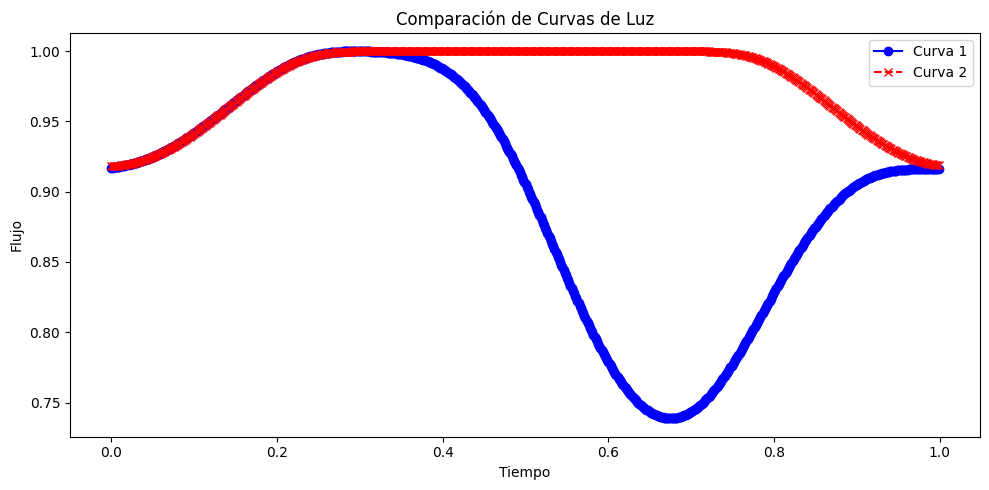

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(df1["Days"], df1["flux_normalized"], label='Curva 1', color='blue', marker='o', linestyle='-')
plt.plot(df2["Days"], df2["flux_normalized"], label='Curva 2', color='red', marker='x', linestyle='--')

plt.xlabel("Tiempo")
plt.ylabel("Flujo")
plt.title("Comparación de Curvas de Luz")
plt.legend()

plt.tight_layout()
plt.show()

📉 MSE entre las curvas: 4.20971226e-04


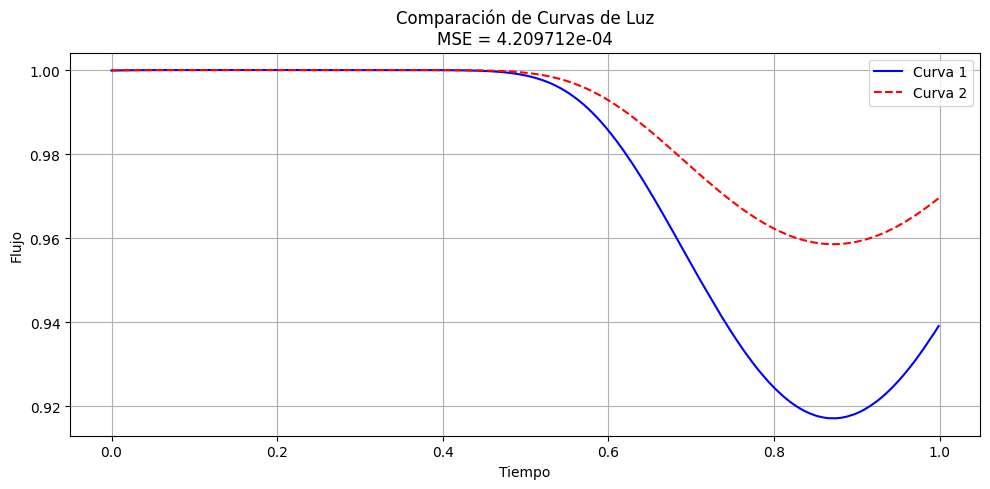

In [5]:

# Calcular MSE
mse = mean_squared_error(df1["flux_normalized"], df2["flux_normalized"])
print(f"📉 MSE entre las curvas: {mse:.8e}")

# Opcional: graficar las curvas
plt.figure(figsize=(10, 5))
plt.plot(df1["Days"], df1["flux_normalized"], label='Curva 1', color='blue')
plt.plot(df2["Days"], df2["flux_normalized"], label='Curva 2', color='red', linestyle='--')
plt.title(f"Comparación de Curvas de Luz\nMSE = {mse:.6e}")
plt.xlabel("Tiempo")
plt.ylabel("Flujo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 5 likely light curve:

1. Archivo: lc_lat10_lon0_rad15.5.csv, Lat: 10.0, Lon: 0.0, Rad: 15.5, MSE: 0.0000347761
2. Archivo: lc_lat-10_lon0_rad15.5.csv, Lat: -10.0, Lon: 0.0, Rad: 15.5, MSE: 0.0000355118
3. Archivo: lc_lat30_lon0_rad15.5.csv, Lat: 30.0, Lon: 0.0, Rad: 15.5, MSE: 0.0011418531
4. Archivo: lc_lat30_lon0_rad20.5.csv, Lat: 30.0, Lon: 0.0, Rad: 20.5, MSE: 0.0011428846
5. Archivo: lc_lat-30_lon0_rad15.5.csv, Lat: -30.0, Lon: 0.0, Rad: 15.5, MSE: 0.0011441988


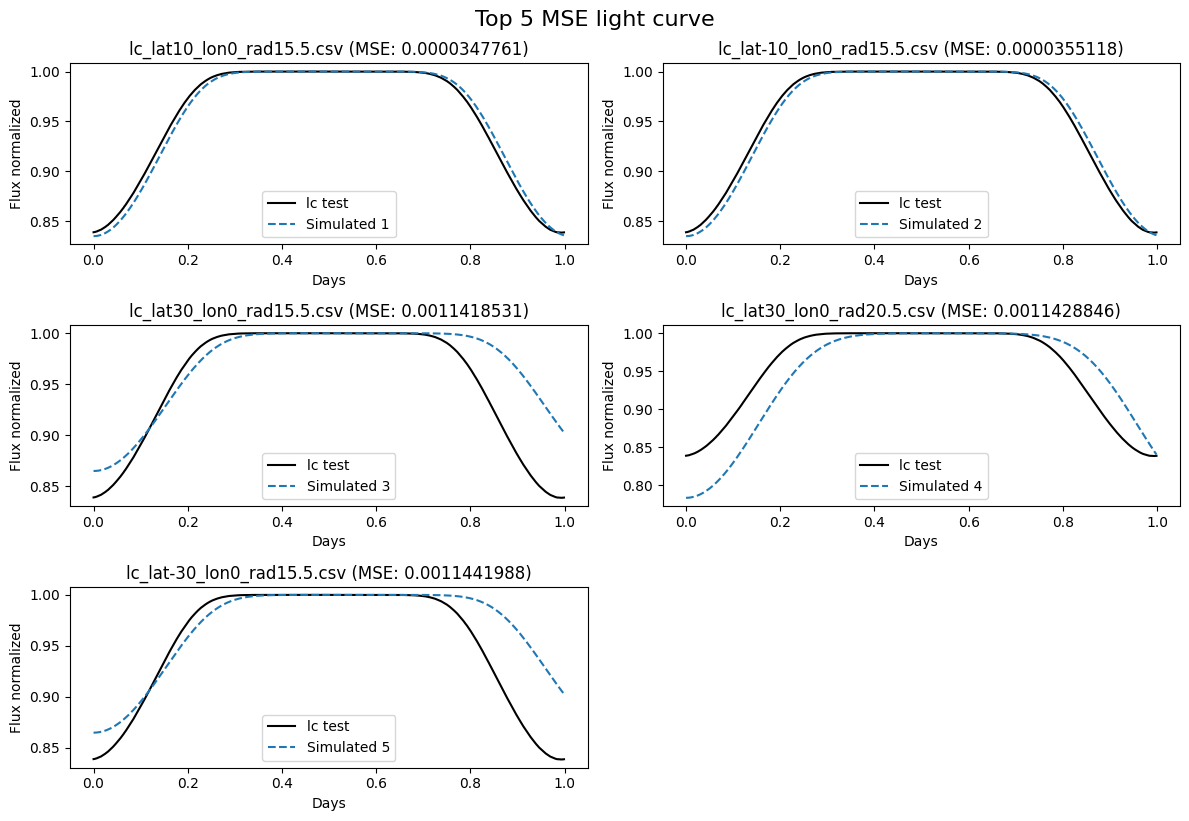

In [6]:


# Paso 1: Cargar tu curva de luz base
#base_curve = pd.read_csv('old_model_test.csv')
base_curve = pd.read_csv('old_model_test.csv')
base_flux = base_curve['flux_normalized'].values
#base_flux = rest
base_time = base_curve['Days'].values

# Paso 2: Carpeta de simulaciones
sim_folder = 'light_curve'
results = []

# Paso 3: Buscar CSV, calcular MSE y extraer parámetros correctamente
for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        try:
            sim_curve = pd.read_csv(path)
            sim_flux = sim_curve['flux_normalized'].values
            sim_time = sim_curve['Days'].values

            # Asegurar misma longitud y tiempos iguales
            #if len(sim_flux) != len(base_flux) or not np.allclose(sim_time, base_time):
                #continue

            # Calcular MSE
            mse = mean_squared_error(base_flux, sim_flux)

            # Extraer parámetros del nombre (usando split más cuidadoso)
            # Ejemplo: lc_lat-10_lon120_rad10.5.csv
            name_parts = file.replace('.csv', '').split('_')
            lat = float(name_parts[1].replace('lat', '').replace('-', '-'))
            lon = float(name_parts[2].replace('lon', ''))
            rad = float(name_parts[3].replace('rad', ''))

            results.append({
                'file': file,
                'lat': lat,
                'lon': lon,
                'rad': rad,
                'mse': mse,
                'flux': sim_flux
            })

        except Exception as e:
            print(f"Error leyendo {file}: {e}")

# Paso 4: Ordenar y mostrar top 5
top5 = sorted(results, key=lambda x: x['mse'])[:5]

print("\nTop 5 likely light curve:\n")
for i, r in enumerate(top5, 1):
    print(f"{i}. Archivo: {r['file']}, Lat: {r['lat']}, Lon: {r['lon']}, Rad: {r['rad']}, MSE: {r['mse']:.10f}")

# Paso 5: Graficar comparaciones
plt.figure(figsize=(12, 8))
for i, r in enumerate(top5, 1):
    plt.subplot(3, 2, i)
    plt.plot(base_time, base_flux, label='lc test', color='black')
    plt.plot(base_time, r['flux'], label=f"Simulated {i}", linestyle='--')
    plt.title(f"{r['file']} (MSE: {r['mse']:.10f})")
    plt.xlabel("Days")
    plt.ylabel("Flux normalized")
    plt.legend()

plt.tight_layout()
plt.suptitle("Top 5 MSE light curve", fontsize=16, y=1.02)
plt.show()


### combination

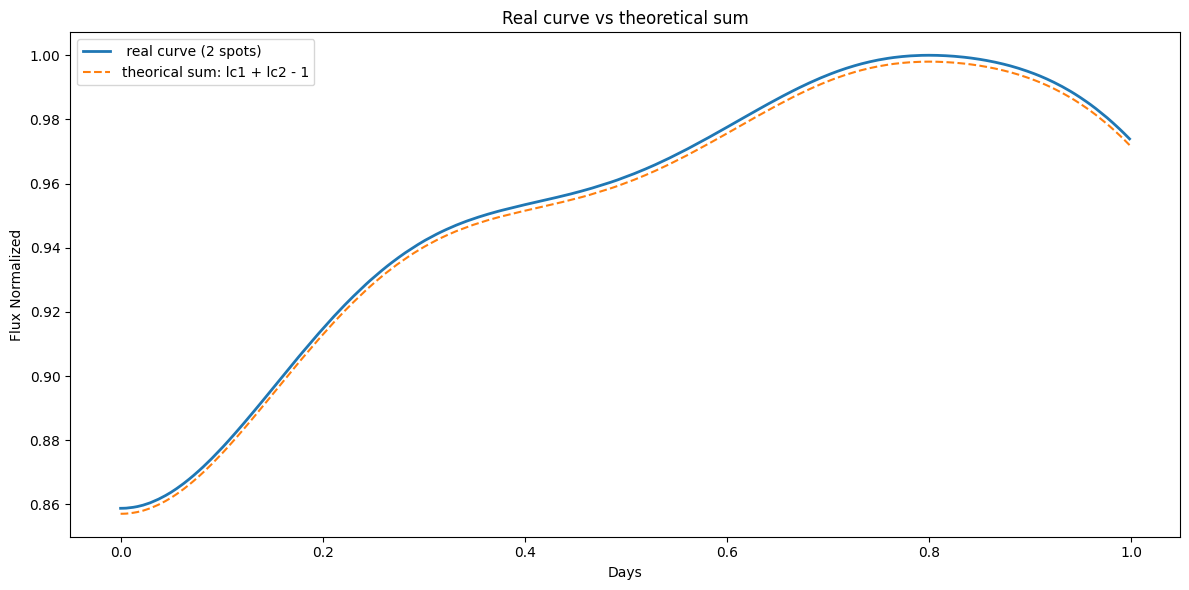

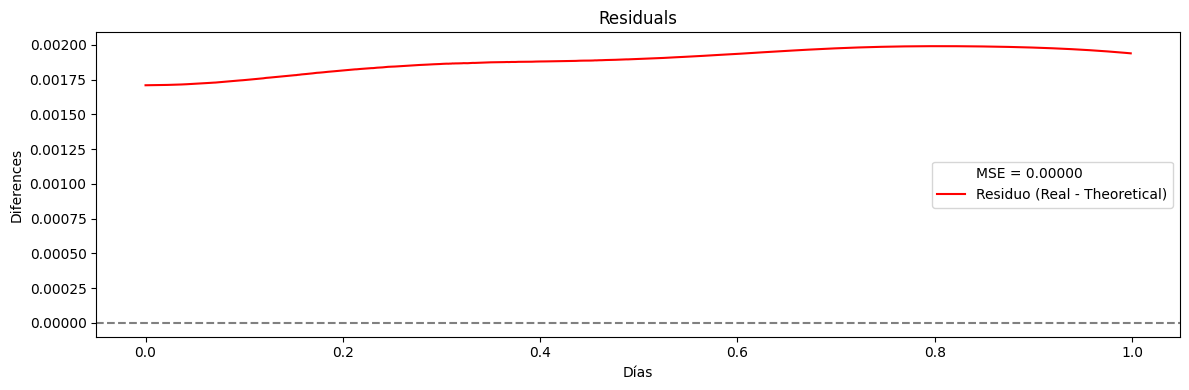

In [10]:



combined = pd.read_csv('2spot_0_240_rai1_20.5.csv')
#combined = pd.read_csv('2spots_0_30.csv')
#combined = pd.read_csv('3spot_0_010_-50_0_20.5_50_240_10.5.csv')
lc1 = pd.read_csv('lc_lat-50_lon0_rad20.5.csv')
lc2 = pd.read_csv('lc_lat50_lon240_rad10.5.csv')

#lc1 = pd.read_csv('lc_lat50_lon240_rad10.5.csv')
#lc2 = pd.read_csv('lc_lat-50_lon0_rad10.5.csv')

df_combined = lc1["flux_normalized"]+lc2["flux_normalized"] -1
pd.DataFrame(df_combined)

###MSE
mse_combined = mean_squared_error(combined["flux_normalized"], df_combined)

# plots
plt.figure(figsize=(12, 6))
plt.plot(combined['Days'], combined["flux_normalized"], label=' real curve (2 spots)', linewidth=2)
plt.plot(combined['Days'], df_combined, label='theorical sum: lc1 + lc2 - 1', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Flux Normalized')
plt.title( 'Real curve vs theoretical sum')
plt.legend()
plt.tight_layout()
plt.savefig('sum_lc.png')
plt.show()

residual =  combined["flux_normalized"] - df_combined 
pd.DataFrame(residual)

# Gráfica: residuo
plt.figure(figsize=(12, 4))
plt.plot([], [], ' ', label=f'MSE = {mse_combined:.5f}')
plt.plot(combined['Days'], residual, label='Residuo (Real - Theoretical)', color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Días')
plt.ylabel('Diferences')
plt.title('Residuals')
plt.legend()
plt.tight_layout()
plt.savefig('residuals.png')
plt.show()


### MSE from real vs theorical

In [16]:

mse_combined

3.5814005400233514e-06

In [17]:
np.max(residual), np.min(residual)

(0.0019897885540974825, 0.0017087313480329547)

### lineal superpositions

In [18]:
lc2_synthetic = combined['flux_normalized'] - lc1["flux_normalized"]+1
lc2_synthetic =pd.DataFrame(lc2_synthetic)

In [19]:
lc2_synthetic

,flux_normalized
0,1.001649
1,1.001646
2,1.001642
3,1.001638
4,1.001634
...,...
715,1.001942
716,1.001941
717,1.001940
718,1.001939



Top 5 likely light curve:

1. Archivo: lc_lat50_lon0_rad20.5.csv, Lat: 50.0, Lon: 0.0, Rad: 20.5, MSE: 0.0001395625
2. Archivo: lc_lat-50_lon0_rad20.5.csv, Lat: -50.0, Lon: 0.0, Rad: 20.5, MSE: 0.0001397704
3. Archivo: lc_lat50_lon0_rad15.5.csv, Lat: 50.0, Lon: 0.0, Rad: 15.5, MSE: 0.0005154488
4. Archivo: lc_lat-50_lon0_rad15.5.csv, Lat: -50.0, Lon: 0.0, Rad: 15.5, MSE: 0.0005157586
5. Archivo: lc_lat-70_lon0_rad20.5.csv, Lat: -70.0, Lon: 0.0, Rad: 20.5, MSE: 0.0005432304


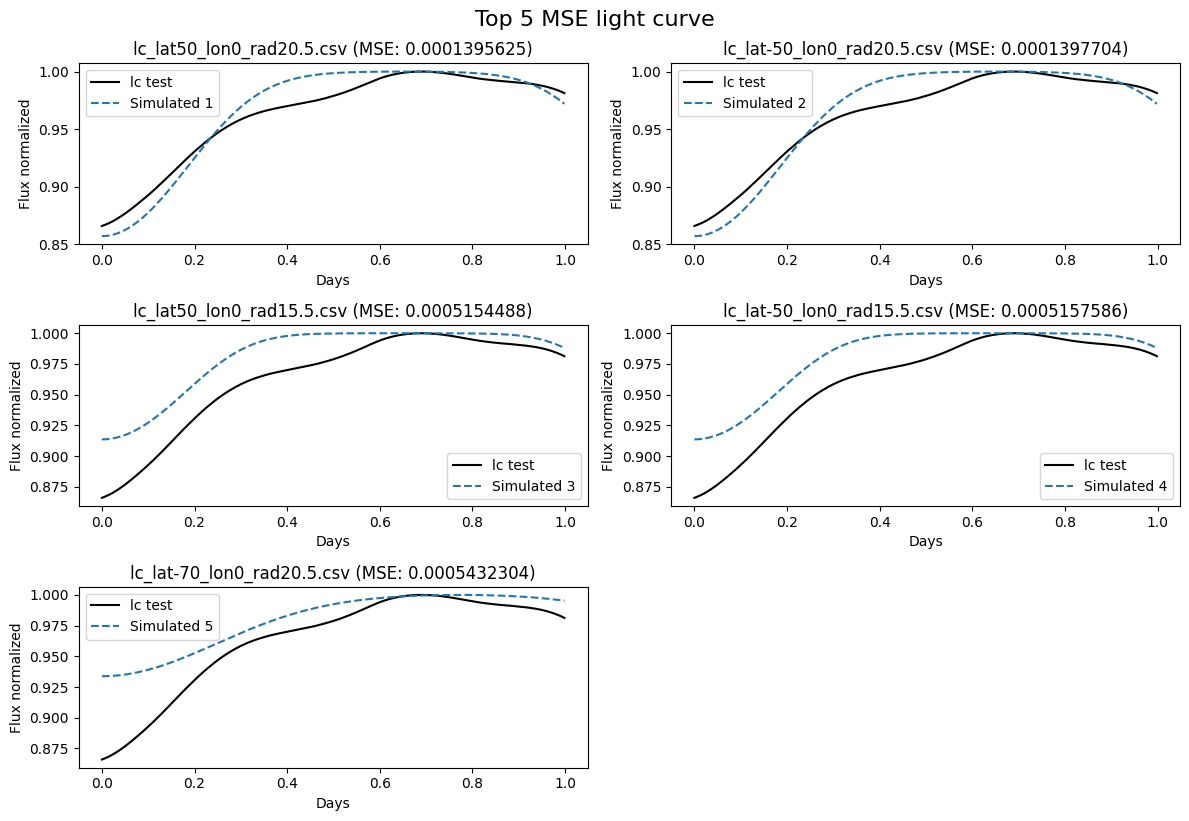

In [21]:


# Paso 1: Cargar tu curva de luz base
base_curve = pd.read_csv('3spot_10_60_5.5_-50_0_20.5_50_240_10.5.csv')
base_flux = base_curve["flux_normalized"]
#base_flux = rest
base_time = combined['Days'].values

# Paso 2: Carpeta de simulaciones
sim_folder = 'light_curve'
results = []

# Paso 3: Buscar CSV, calcular MSE y extraer parámetros correctamente
for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        try:
            sim_curve = pd.read_csv(path)
            sim_flux = sim_curve['flux_normalized'].values
            sim_time = sim_curve['Days'].values

            # Asegurar misma longitud y tiempos iguales
            #if len(sim_flux) != len(base_flux) or not np.allclose(sim_time, base_time):
                #continue

            # Calcular MSE
            mse = mean_squared_error(base_flux, sim_flux)

            # Extraer parámetros del nombre (usando split más cuidadoso)
            # Ejemplo: lc_lat-10_lon120_rad10.5.csv
            name_parts = file.replace('.csv', '').split('_')
            lat = float(name_parts[1].replace('lat', '').replace('-', '-'))
            lon = float(name_parts[2].replace('lon', ''))
            rad = float(name_parts[3].replace('rad', ''))

            results.append({
                'file': file,
                'lat': lat,
                'lon': lon,
                'rad': rad,
                'mse': mse,
                'flux': sim_flux
            })

        except Exception as e:
            print(f"Error leyendo {file}: {e}")

# Paso 4: Ordenar y mostrar top 5
top5 = sorted(results, key=lambda x: x['mse'])[:5]

print("\nTop 5 likely light curve:\n")
for i, r in enumerate(top5, 1):
    print(f"{i}. Archivo: {r['file']}, Lat: {r['lat']}, Lon: {r['lon']}, Rad: {r['rad']}, MSE: {r['mse']:.10f}")

# Paso 5: Graficar comparaciones
plt.figure(figsize=(12, 8))
for i, r in enumerate(top5, 1):
    plt.subplot(3, 2, i)
    plt.plot(base_time, base_flux, label='lc test', color='black')
    plt.plot(base_time, r['flux'], label=f"Simulated {i}", linestyle='--')
    plt.title(f"{r['file']} (MSE: {r['mse']:.10f})")
    plt.xlabel("Days")
    plt.ylabel("Flux normalized")
    plt.legend()

plt.tight_layout()
plt.suptitle("Top 5 MSE light curve", fontsize=16, y=1.02)
plt.show()


### components of lc

In [22]:
c1 = pd.read_csv('lc_lat-50_lon0_rad20.5.csv')
lc2_compponent = base_curve['flux_normalized'] - c1["flux_normalized"]+1
lc2_compponent =pd.DataFrame(lc2_compponent)


Top 5 likely light curve:

1. Archivo: lc_lat50_lon240_rad5.5.csv, Lat: 50.0, Lon: 240.0, Rad: 5.5, MSE: 0.0000618731
2. Archivo: lc_lat-50_lon240_rad5.5.csv, Lat: -50.0, Lon: 240.0, Rad: 5.5, MSE: 0.0000618814
3. Archivo: lc_lat10_lon180_rad5.5.csv, Lat: 10.0, Lon: 180.0, Rad: 5.5, MSE: 0.0000625276
4. Archivo: lc_lat-10_lon180_rad5.5.csv, Lat: -10.0, Lon: 180.0, Rad: 5.5, MSE: 0.0000626591
5. Archivo: lc_lat-30_lon240_rad5.5.csv, Lat: -30.0, Lon: 240.0, Rad: 5.5, MSE: 0.0000648442


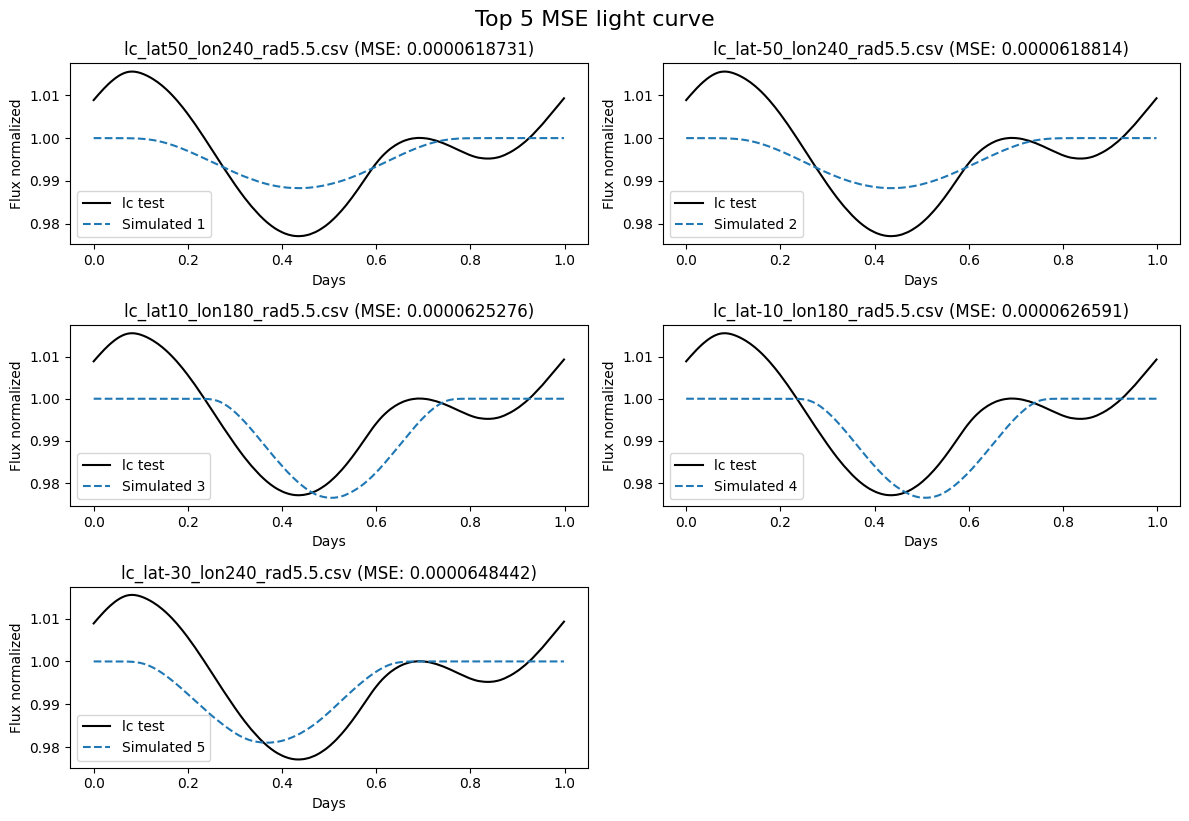

In [23]:


# Paso 1: Cargar tu curva de luz base
#base_curve = lc2_compponent['flux_normalized']
base_flux = lc2_compponent["flux_normalized"]
#base_flux = rest
base_time = c1['Days'].values

# Paso 2: Carpeta de simulaciones
sim_folder = 'light_curve'
results = []

# Paso 3: Buscar CSV, calcular MSE y extraer parámetros correctamente
for file in os.listdir(sim_folder):
    if file.endswith('.csv'):
        path = os.path.join(sim_folder, file)
        try:
            sim_curve = pd.read_csv(path)
            sim_flux = sim_curve['flux_normalized'].values
            sim_time = sim_curve['Days'].values

            # Asegurar misma longitud y tiempos iguales
            #if len(sim_flux) != len(base_flux) or not np.allclose(sim_time, base_time):
                #continue

            # Calcular MSE
            mse = mean_squared_error(base_flux, sim_flux)

            # Extraer parámetros del nombre (usando split más cuidadoso)
            # Ejemplo: lc_lat-10_lon120_rad10.5.csv
            name_parts = file.replace('.csv', '').split('_')
            lat = float(name_parts[1].replace('lat', '').replace('-', '-'))
            lon = float(name_parts[2].replace('lon', ''))
            rad = float(name_parts[3].replace('rad', ''))

            results.append({
                'file': file,
                'lat': lat,
                'lon': lon,
                'rad': rad,
                'mse': mse,
                'flux': sim_flux
            })

        except Exception as e:
            print(f"Error leyendo {file}: {e}")

# Paso 4: Ordenar y mostrar top 5
top5 = sorted(results, key=lambda x: x['mse'])[:5]

print("\nTop 5 likely light curve:\n")
for i, r in enumerate(top5, 1):
    print(f"{i}. Archivo: {r['file']}, Lat: {r['lat']}, Lon: {r['lon']}, Rad: {r['rad']}, MSE: {r['mse']:.10f}")

# Paso 5: Graficar comparaciones
plt.figure(figsize=(12, 8))
for i, r in enumerate(top5, 1):
    plt.subplot(3, 2, i)
    plt.plot(base_time, base_flux, label='lc test', color='black')
    plt.plot(base_time, r['flux'], label=f"Simulated {i}", linestyle='--')
    plt.title(f"{r['file']} (MSE: {r['mse']:.10f})")
    plt.xlabel("Days")
    plt.ylabel("Flux normalized")
    plt.legend()

plt.tight_layout()
plt.suptitle("Top 5 MSE light curve", fontsize=16, y=1.02)
plt.show()
